# Dendrograma
Visualização hierárquica: Para dados com muitos clusters ou uma estrutura hierárquica, você pode representar a árvore de clusters ou dendrograma para visualizar como os clusters estão relacionados entre si.

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn import cluster, datasets

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

In [4]:
# Carregar dados do Excel
data = pd.read_excel('dh fractal.xlsx', sheet_name = "Sheet1")

# Selecionar as colunas relevantes - tabela com os valores de neurito CTL
X = data[['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

In [5]:
# Separar os dados de controle e tratamento
data_Control = data[data['grupo'] == 'Control']
data_H2O2 = data[data['grupo'] == 'H2O2']
data_EtOH = data[data['grupo'] == 'EtOH']
data_DHvehicle = data[data['grupo'] == 'DH vehicle']
data_DH2APB = data[data['grupo'] == 'DH 2-APB']

# Selecionar as colunas relevantes para controle
X_Control = data_Control [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_H2O2 = data_H2O2 [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_EtOH = data_EtOH [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_DHvehicle = data_DHvehicle [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

X_DH2APB = data_DH2APB [['MEAN FOREGROUND PIXELS', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 'Maximum Span Across Hull',
           'Area', 'Perimeter', 'Circularity', 'Width of Bounding Rectangle',
           'Maximum Radius from Hulls Centre of Mass', 'Max/Min Radii', 'CV for all Radii',
           'Mean Radius', 'Diameter of Bounding Circle', 'Maximum Radius from Circles Centre', 'Max/Min Radii from Circles Centre',
           'CV for all Radii from Circles Centre', 'Mean Radius from Circles Centre', '10. ⋆D (D with highest r²) for Dʙ',
           '13. ⋆Y-INT for Dʙ', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]

In [6]:
# Normalizar os dados para controle...
X_Control = StandardScaler().fit_transform(X_Control)

X_H2O2 = StandardScaler().fit_transform(X_H2O2)

X_EtOH = StandardScaler().fit_transform(X_EtOH)

X_DHvehicle = StandardScaler().fit_transform(X_DHvehicle)

X_DH2APB = StandardScaler().fit_transform(X_DH2APB)

# Redução de dimensionalidade com PCA para controle...
pca_Control = PCA(n_components=20)
X_pca_Control = pca_Control.fit_transform(X_Control)

pca_H2O2 = PCA(n_components=20)
X_pca_H2O2 = pca_H2O2.fit_transform(X_H2O2)

pca_EtOH = PCA(n_components=20)
X_pca_EtOH = pca_EtOH.fit_transform(X_EtOH)

pca_DHvehicle = PCA(n_components=20)
X_pca_DHvehicle = pca_DHvehicle.fit_transform(X_DHvehicle)

pca_DH2APB = PCA(n_components=20)
X_pca_DH2APB = pca_DH2APB.fit_transform(X_DH2APB)

# Unir os dados reduzidos de controle e tratamento
X_pca = np.concatenate((X_pca_Control, X_pca_H2O2, X_pca_EtOH, X_pca_DHvehicle, X_pca_DH2APB))


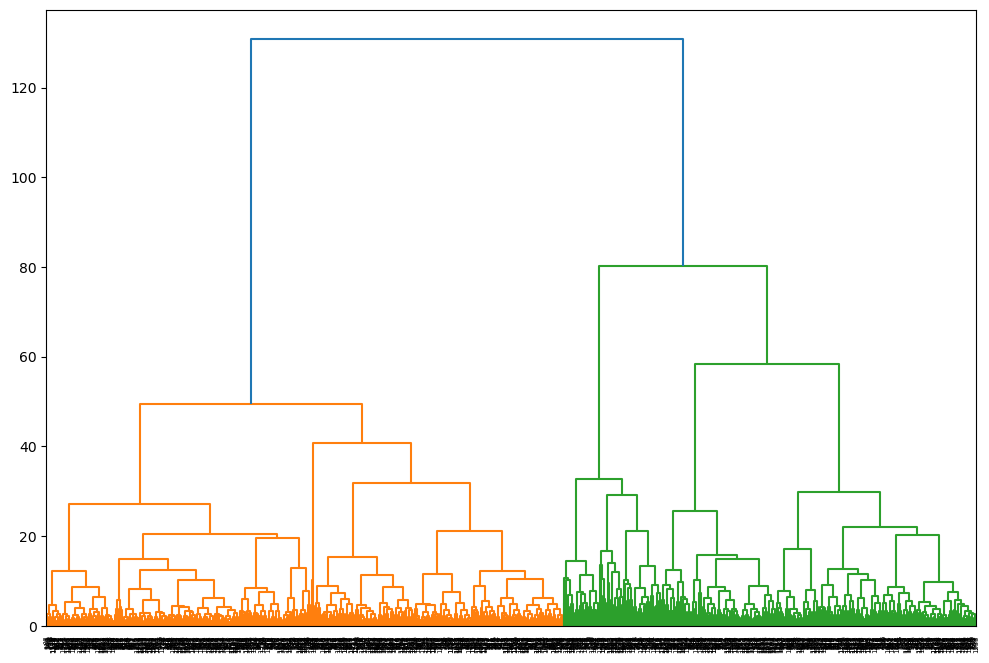

In [7]:
# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Calcular a matriz de ligação para o dendrograma
sch.dendrogram(sch.linkage(X_pca, method='ward'))

# Salvar a figura
#plt.savefig('Clustering Hierárquico veiculo vs ata.png')

plt.show() 

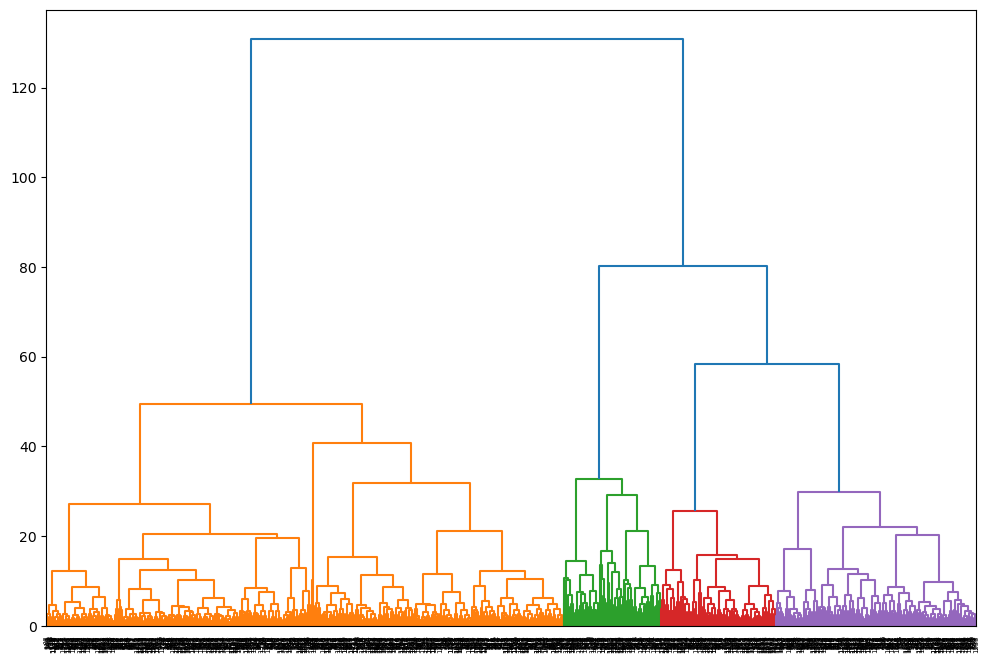

[ 55  87  41 ...  37   9 140]


In [15]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Calcular a matriz de ligação para o dendrograma
linkage_matrix = hierarchy.linkage(X_pca, method='ward')

# Definir o limite de cor para os clusters
color_threshold = 50  # Ajuste conforme necessário

# Plotar o dendrograma com cores para os clusters
dendrogram = hierarchy.dendrogram(linkage_matrix, color_threshold=color_threshold)

plt.show()

# Obter os rótulos dos clusters com base no limite de distância
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Imprimir os rótulos dos clusters
print(cluster_labels)


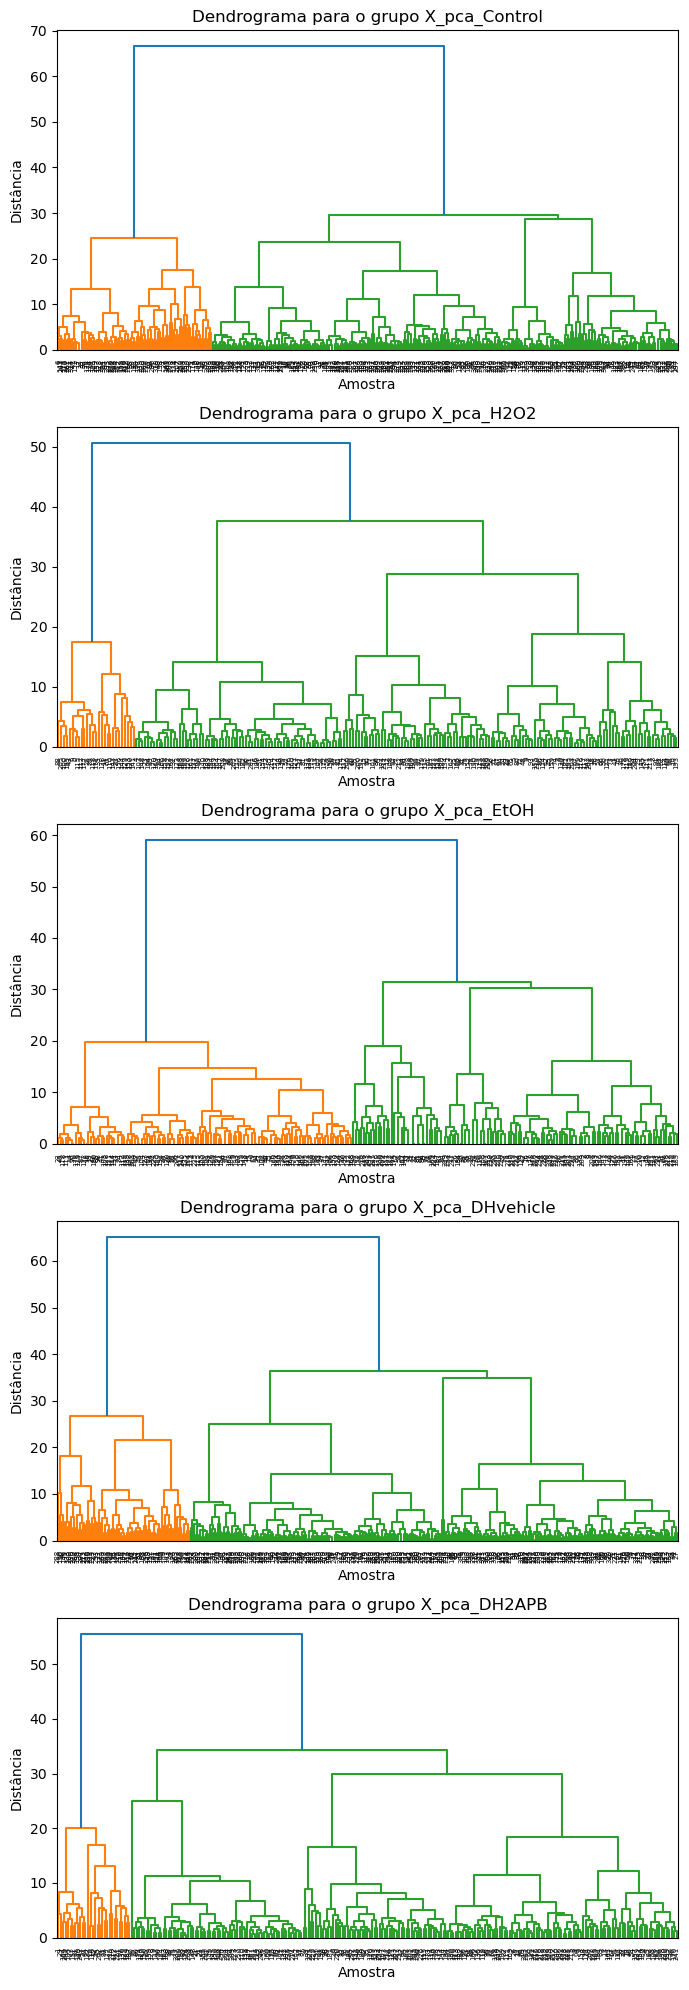

In [37]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

# Função para plotar dendrograma para um grupo específico
def plot_dendrogram_for_group(ax, X_group, group_name):
    # Calcular a matriz de ligação para o dendrograma
    linkage_matrix = hierarchy.linkage(X_group, method='ward')

    # Definir o limite de cor para os clusters
    color_threshold = 40  # Ajuste conforme necessário

    # Plotar o dendrograma com cores para os clusters
    dendrogram = hierarchy.dendrogram(linkage_matrix, color_threshold=color_threshold, ax=ax)
    ax.set_title(f'Dendrograma para o grupo {group_name}')
    ax.set_xlabel('Amostra')
    ax.set_ylabel('Distância')

# Definir o tamanho da figura e o número de subplots
fig, axs = plt.subplots(5, 1, figsize=(7, 20))

# Plotar dendrograma para cada grupo separadamente
plot_dendrogram_for_group(axs[0], X_pca_Control, 'X_pca_Control')
plot_dendrogram_for_group(axs[1], X_pca_H2O2, 'X_pca_H2O2')
plot_dendrogram_for_group(axs[2], X_pca_EtOH, 'X_pca_EtOH')
plot_dendrogram_for_group(axs[3], X_pca_DHvehicle, 'X_pca_DHvehicle')
plot_dendrogram_for_group(axs[4], X_pca_DH2APB, 'X_pca_DH2APB')

# Ajustar o layout dos subplots
plt.tight_layout()

# Salvar a figura
plt.savefig('dendrogramas_threshold40.png')




No dendrograma, as cores indicam os clusters formados em diferentes alturas do dendrograma. Cada ramo do dendrograma representa um cluster, e a altura em que dois ramos são unidos indica a distância ou similaridade entre esses clusters.

Para identificar visualmente os clusters formados, você pode observar onde as linhas do dendrograma são cortadas pela linha horizontal definida pelo parâmetro color_threshold. Cada segmento de linha abaixo desse limite representa um cluster separado.

No entanto, se você deseja rotular explicitamente os clusters, precisará utilizar outras técnicas para identificá-los. Uma maneira comum é usar a técnica de corte do dendrograma, onde você traça uma linha horizontal no dendrograma e conta quantas vezes ela intersecta os ramos verticais. Cada interseção representa um cluster.